![](https://www.thewrap.com/wp-content/uploads/2016/06/iron-throne.jpg)

# Part 1, exploratory data analysis (EDA)

1. [1 балл] Загрузка данных - загрузите датасет, указав, что нулевой столбец - это индекс датасета. Посмотрите на его `head` и `tail`. После этого воспользуйтесь функцией `describe()` для отображения базовых статистик переменных. Для удобства отображения можно транспонировать получившийся датафрейм при помощи `.T`. 
2. [1 балл] Сколько героев уже успело помереть? (целевая переменная - `isAlive`)
3. [1 балл] Какой средний возраст у железорождённых? А у жителей Дорна? (смотреть по переменной `culture`)
4. [1 балл] Визуализация - Постройте гистограммы всех числовых переменных датасета при помощи одной команды. Для удобства отображения задайте размер графика `figsize` равным (25, 20).
5. [1 балл] Визуализация - При помощи `heatmap` постройте тепловую карту корреляций для всего датасета. 
6. [2 балла] Визуализация - при помощи `factorplot` постройте график зависимости переменой `isAlive` от `isMarried`, при этом  разделив график по полу при помощи параметра `hue` и переменной `male` (мы так уже делали на семинаре с титаником). Кем лучше быть, чтобы повысить шансы на выживание? А кто помирает чаще всего? 
7. [3 балла] Вопрос-сюрприз! Попробуйте самостоятельно придумать и происследовать два каких-нибудь осмысленных вопроса и/или визуализаций для вашего датасета. Инициатива не наказуема, так что удивите меня ;)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
data = pd.read_csv ('../datasets/Fashutdinova_Game_of_Thrones.csv')

In [64]:
#Считывание файла с помощью read_csv
data = pd.read_csv ('Fashutdinova_Game_of_Thrones.csv')
#Вывод первых 5-ти элементов
data.head()

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [65]:
#Вывод последних 5-ти элементов
print(data.tail().T)

                          1941          1942              1943  \
S.No                      1942          1943              1944   
actual                       0             0                 1   
pred                         1             1                 1   
alive                    0.803         0.987              0.52   
plod                     0.197         0.013              0.48   
name                     Luwin          Reek  Symeon Star-Eyes   
title                      NaN           NaN               NaN   
male                         1             1                 1   
culture               Westeros           NaN               NaN   
dateOfBirth                NaN           NaN               NaN   
DateoFdeath                299           299               NaN   
mother                     NaN           NaN               NaN   
father                     NaN           NaN               NaN   
heir                       NaN           NaN               NaN   
house     

In [66]:
data.isnull().sum()/len(data)

S.No                 0.000000
actual               0.000000
pred                 0.000000
alive                0.000000
plod                 0.000000
name                 0.000000
title                0.517986
male                 0.000000
culture              0.652107
dateOfBirth          0.777492
DateoFdeath          0.771840
mother               0.989209
father               0.986639
heir                 0.988181
house                0.219424
spouse               0.858171
book1                0.000000
book2                0.000000
book3                0.000000
book4                0.000000
book5                0.000000
isAliveMother        0.989209
isAliveFather        0.986639
isAliveHeir          0.988181
isAliveSpouse        0.858171
isMarried            0.000000
isNoble              0.000000
age                  0.777492
numDeadRelations     0.000000
boolDeadRelations    0.000000
isPopular            0.000000
popularity           0.000000
isAlive              0.000000
dtype: flo

In [3]:
#сорри, я все таки дропнула house, хоп хей лала лей
data.drop(['age'], axis=1, inplace=True) 
data.drop(['house'], axis=1, inplace=True) 
data.drop(['dateOfBirth'], axis=1, inplace=True) 
data.drop(['isAliveSpouse'], axis=1, inplace=True) 
data.drop(['isAliveHeir'], axis=1, inplace=True) 
data.drop(['isAliveFather'], axis=1, inplace=True) 
data.drop(['isAliveMother'], axis=1, inplace=True) 
data.drop(['father'], axis=1, inplace=True) 
data.drop(['mother'], axis=1, inplace=True) 
data.drop(['culture'], axis=1, inplace=True) 
data.drop(['title'], axis=1, inplace=True) 
data.drop(['DateoFdeath'], axis=1, inplace=True) 
data.drop(['heir'], axis=1, inplace=True) 
data.drop(['spouse'], axis=1, inplace=True) 
data.drop(['pred'], axis=1, inplace=True) 
data.drop(['plod'], axis=1, inplace=True) 
data.drop(['alive'], axis=1, inplace=True) 
data.drop(['name'], axis=1, inplace=True) 
data.isnull().sum()/len(data)

S.No                 0.0
actual               0.0
male                 0.0
book1                0.0
book2                0.0
book3                0.0
book4                0.0
book5                0.0
isMarried            0.0
isNoble              0.0
numDeadRelations     0.0
boolDeadRelations    0.0
isPopular            0.0
popularity           0.0
isAlive              0.0
dtype: float64

In [4]:
target = 'isAlive'  

categories = ['male','actual', 'book1','book2','book3','book4','book5','isMarried',
              'isNoble','boolDeadRelations','isPopular','popularity']       

In [5]:
data_categories = pd.get_dummies(data[categories], dummy_na=True, drop_first=True)
data_categories.head()

,male,actual,book1,book2,book3,book4,book5,isMarried,isNoble,boolDeadRelations,isPopular,popularity
0,1,0,0,0,0,0,0,0,0,1,1,0.605351
1,1,1,1,1,1,1,1,1,1,1,1,0.896321
2,1,1,0,0,0,1,0,0,1,0,0,0.267559
3,0,0,0,0,0,0,0,1,1,0,0,0.183946
4,0,1,0,0,0,1,0,1,1,0,0,0.043478


In [6]:
data.isnull().sum()

S.No                 0
actual               0
male                 0
book1                0
book2                0
book3                0
book4                0
book5                0
isMarried            0
isNoble              0
numDeadRelations     0
boolDeadRelations    0
isPopular            0
popularity           0
isAlive              0
dtype: int64

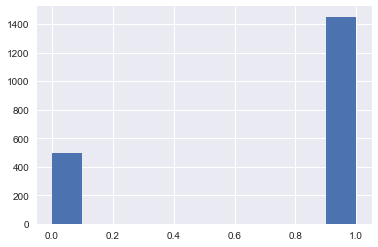

In [7]:
data.isAlive.hist() # 1 - positive, 0 - negative#

In [8]:
A = data['isAlive'].values
B = data.drop('isAlive',axis=1).values
A.shape, B.shape

((1946,), (1946, 14))

In [9]:
from sklearn.model_selection import train_test_split

A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.3, random_state=42)

print (A_train.shape, B_train.shape)
print (A_test.shape, B_test.shape)

(1362,) (1362, 14)
(584,) (584, 14)


In [10]:
from sklearn.neighbors import KNeighborsClassifier# nearest neighbour#

clf_knn = KNeighborsClassifier(n_neighbors=6)
clf_knn.fit(B_train, A_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [11]:
A_predicted = clf_knn.predict(B_test)
A_predicted

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy =', accuracy_score(A_test, A_predicted))
print('Precision =', precision_score(A_test, A_predicted))
print('Recall =', recall_score(A_test, A_predicted))
print('F1_score =', f1_score(A_test, A_predicted))

Accuracy = 0.6541095890410958
Precision = 0.7441860465116279
Recall = 0.812933025404157
F1_score = 0.7770419426048564


In [13]:
A_probe = clf_knn.predict_proba(B_test)
A_probe[:10]

array([[0.16666667, 0.83333333],
       [0.16666667, 0.83333333],
       [0.        , 1.        ],
       [0.16666667, 0.83333333],
       [0.33333333, 0.66666667],
       [0.5       , 0.5       ],
       [0.16666667, 0.83333333],
       [0.16666667, 0.83333333],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667]])

In [14]:
A_predicted = (A_probe[:,1] >= 0.6)
A_predicted[:10]

array([ True,  True,  True,  True,  True, False,  True,  True, False,
        True])

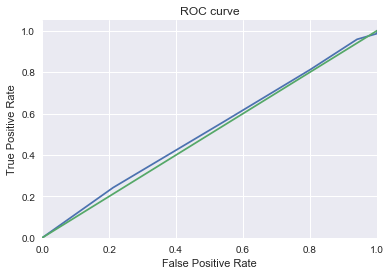

In [15]:
from sklearn.metrics import roc_auc_score, roc_curve 
fpr, tpr, thresholds = roc_curve(A_test, A_probe[:,1])
plt.plot(fpr, tpr, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [16]:
print('AUC =', roc_auc_score(A_test, A_probe[:,1]))#meh!#

AUC = 0.5173363106617929


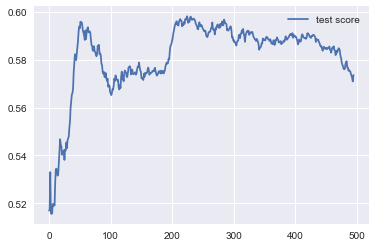

In [17]:
rocauc_train = [ ]
rocauc_test = [ ]

for k in range(5,500):
    clf_knn = KNeighborsClassifier(n_neighbors=k)
    clf_knn.fit(B_train, A_train)
    
    # Ошибка на тестовой выборке 
    A_probe = clf_knn.predict_proba(B_test)
    rocauc_test.append(roc_auc_score(A_test, A_probe[:,1]))
    
plt.plot(rocauc_test, label='test score')
plt.legend()

In [18]:
max(rocauc_test)

0.5982594864108407

## Комментарий
Это хорошо, что попытались найти, при каком числе соседей достигается максимум целевой метрики - а как насчет дальше подставить это оптимальное число соседей, чтобы модель лучше стала? ;)

In [19]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier()     
clf_tree.fit(B_train, A_train)          
A_predicted = clf_tree.predict(B_test)  
A_proba = clf_tree.predict_proba(B_test)

In [20]:
print('Accuracy =', accuracy_score(A_test, A_predicted))
print('Precision =', precision_score(A_test, A_predicted))
print('Recall =', recall_score(A_test, A_predicted))
print('F1_score =', f1_score(A_test, A_predicted))


Accuracy = 0.9965753424657534
Precision = 0.9976905311778291
Recall = 0.9976905311778291
F1_score = 0.9976905311778291


### Комментарий
исправил вам построение рок кривой, потому что вы не из той модели использовали предсказания вероятностей :Р

AUC = 0.9955340073107688


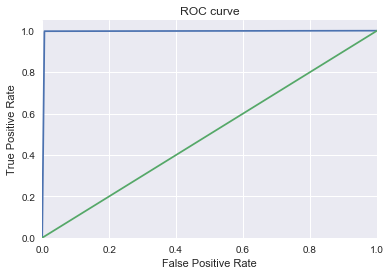

In [22]:
print('AUC =', roc_auc_score(A_test, A_proba[:,1]))

fpr, tpr, thresholds = roc_curve(A_test, A_proba[:,1])
plt.plot(fpr, tpr, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rfc = RandomForestClassifier(n_estimators=10) 
rfc.fit(B_train, A_train)
y_predicted = rfc.predict(B_test)
y_proba = rfc.predict_proba(B_test)

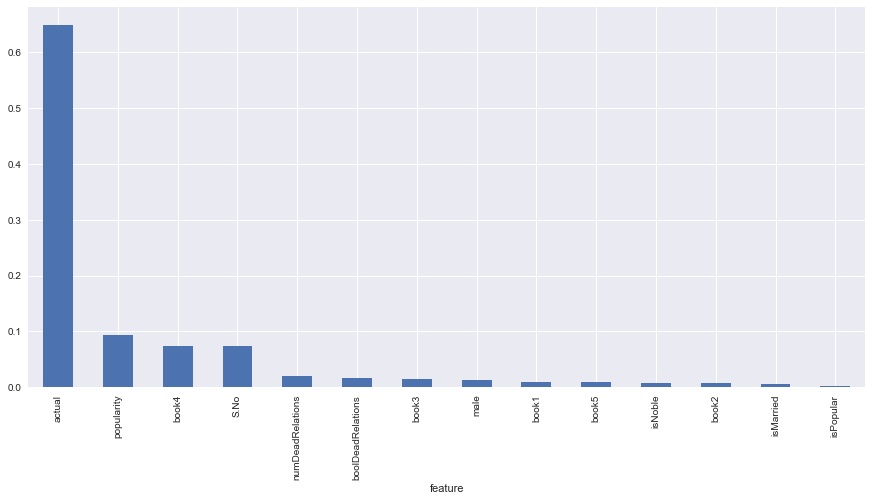

In [25]:
featureImportance = pd.DataFrame({"feature": data.drop('isAlive',axis=1).columns, 
                                  "importance": rfc.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(15,7))

## Комментарий

Хммм, похоже, одна переменная у нас доминирует, а судя по названию, в ней заключается ответ - жив ли персонаж на самом деле

Эхъ, судя по всему, действительно эту переменную надо было дропнуть

In [36]:
(data.actual==data.isAlive).head(30)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
dtype: bool

### Комментарий
Дальше я дропнул эту переменную и прогоняю остальной код уже без неё

In [38]:
data.drop(['actual'], axis=1, inplace=True)

In [39]:
A = data['isAlive']
B = data.drop('isAlive',axis=1)

A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.3, random_state=42)

In [40]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':range(5, 100), 'weights':['uniform', 'distance']}

knc = KNeighborsClassifier()

clf = GridSearchCV(knc, parameters)

clf.fit(B_train, A_train)
clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=40, p=2,
           weights='uniform')

In [41]:
A_proba = clf.predict_proba(B_test)[:,1]
print('AUC =', roc_auc_score(A_test, A_proba))

AUC = 0.5574690668828288


In [42]:
parameters = {
              'n_estimators': [10,20,50,70,100],          
              'min_samples_leaf': [1, 3, 5, 7, 10],       
             }

rfc = RandomForestClassifier(random_state=42)   

gcv = GridSearchCV(rfc, parameters, n_jobs= -1) 
gcv.fit(B, A)
gcv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [43]:
A_predicted = gcv.predict(B_test)
A_probe = gcv.predict_proba(B_test)

In [45]:
A_probe = clf.predict_proba(B_test)[:,1]
print('AUC =', roc_auc_score(A_test, A_probe))

AUC = 0.5574690668828288


In [46]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(B_train, A_train)
logit.predict_proba(B_test)
logit.predict(B_test)

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

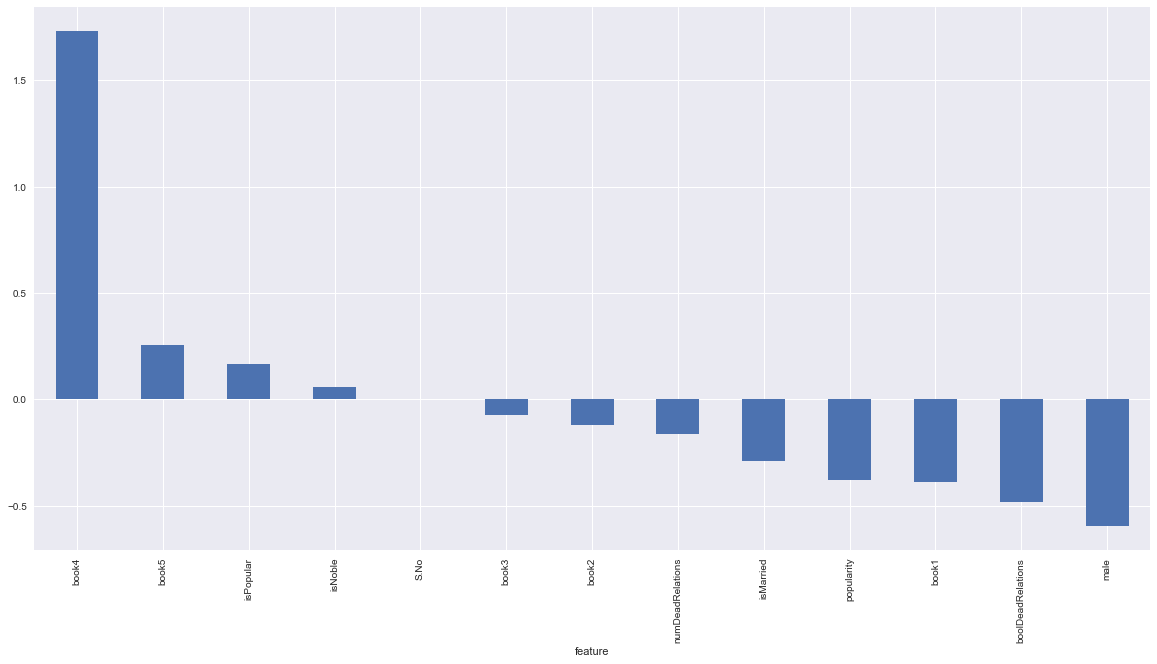

In [47]:
featureImportance = pd.DataFrame({"feature": data.drop('isAlive',axis=1).columns, 
"importance": logit.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].head(30).plot('bar', figsize=(20,10))
featureImportance["importance"].tail(30).plot('bar', figsize=(20,10))

### Комментарий
Довольно интересно, если персонаж был жив в 4-й книге - это сильно повышает его шансы на выживание, в принципе, а вот мужчинам действительно везёт меньше

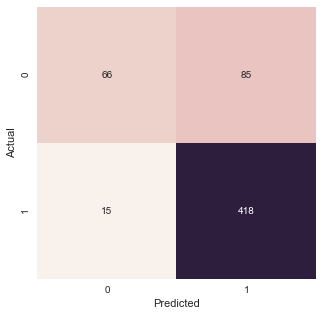

In [48]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix 
array = confusion_matrix(A_test, A_predicted) 
df_cm = pd.DataFrame(array) 
plt.figure(figsize = (5,5)) 
sns.heatmap(df_cm, annot=True, fmt='g', cbar=False) 
plt.ylabel("Actual") 
plt.xlabel("Predicted");

### Итого

С предобработкой всё ок, хотя дома можно было и оставить (хоп хей)

С модельками - дропнуть ответ из данных стоило с самого начала, но в целом и модельки разные потрогали, и настройка есть :)

С метриками и визулизацией - чуть-чуть косяков тоже есть, но в целом хорошо